In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
import os
os.getcwd()

'/workspaces/mlops-things/deployment-with-k8s'

In [5]:
df = pd.read_csv("data/Names_Dataset.csv")

In [6]:
df.shape

(3238, 3)

In [7]:
df.head()

,Unnamed: 0,names,nationality
0,0,Gershon,yiddish
1,1,Lantz,yiddish
2,2,Zaide,yiddish
3,3,Zalman,yiddish
4,4,Zindel,yiddish


In [8]:
df.columns

Index(['Unnamed: 0', 'names', 'nationality'], dtype='object')

In [10]:
df['nationality'].unique(), len(df['nationality'].unique())

(array(['yiddish', 'gaelic', 'african', 'irish', 'hungarian', 'german',
        'swedish', 'japanese', 'italian', 'american', 'hawaiian', 'greek',
        'polynesian', 'scandinavian', 'spanish', 'celtic', 'old-english',
        'korean', 'sanskrit', 'african-american', 'hebrew', 'norse',
        'chinese', 'finnish', 'persian', 'scottish', 'slavic', 'english',
        'old-norse', 'dutch', 'armenian', 'welsh', 'polish', 'teutonic',
        'russian', 'egyptian', 'arabic', 'swahili', 'native-american',
        'old-french', 'french', 'middle-english', 'latin', 'vietnamese',
        'danish', 'hindi', 'old-german', 'turkish', 'indian',
        'czechoslovakian'], dtype=object),
 50)

In [11]:
df.groupby('nationality')['names'].size()

nationality
african             100
african-american    100
american            100
arabic              100
armenian             17
celtic               62
chinese             100
czechoslovakian      38
danish               11
dutch                24
egyptian             30
english             100
finnish              13
french              100
gaelic               87
german              100
greek               100
hawaiian            100
hebrew              100
hindi               100
hungarian            64
indian               25
irish               100
italian             100
japanese            100
korean               16
latin               100
middle-english       45
native-american     100
norse                40
old-english         100
old-french           46
old-german           40
old-norse            28
persian              55
polish               48
polynesian           15
russian              85
sanskrit             28
scandinavian        100
scottish             74
slav

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='nationality'>

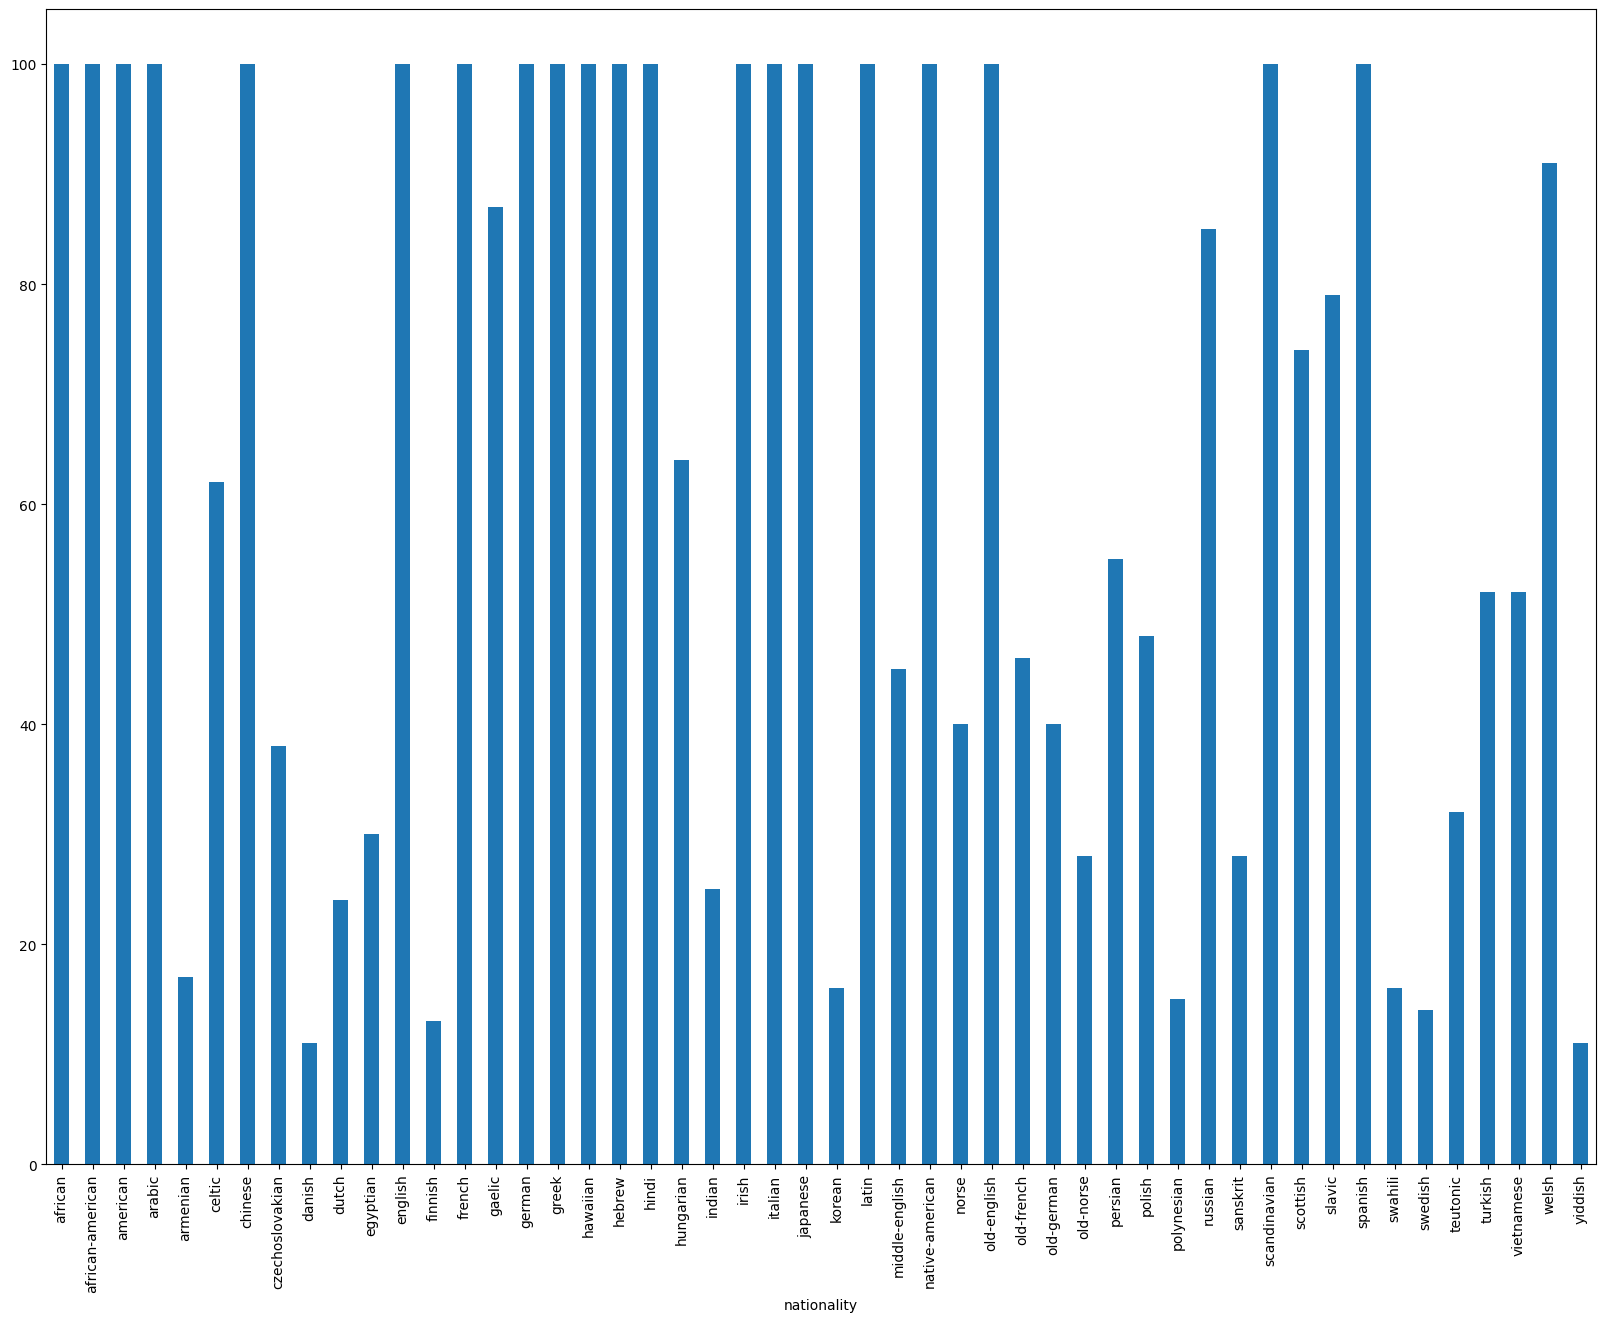

In [13]:
df.groupby('nationality')['names'].size().plot(kind='bar', figsize=(20, 15))

In [14]:
xfeatures = df['names']
ylabels = df['nationality']

In [16]:
vec = CountVectorizer()
X = vec.fit_transform(xfeatures)

In [19]:
vec.get_feature_names_out()

array(['aaliyah', 'aari', 'aaron', ..., 'zygmunt', 'örkény', 'örs'],
      shape=(2973,), dtype=object)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, ylabels, test_size=(0.3))

In [21]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [22]:
nb.score(x_test, y_test)

0.059670781893004114

In [26]:
name1 = ["Yin","Bathsheba","Brittany","Vladmir", "nguyễn"]
vector1 = vec.transform(name1).toarray()
nb.predict(vector1)

array(['chinese', 'hebrew', 'english', 'african-american',
       'african-american'], dtype='<U16')

In [28]:
import joblib

nationality_predictor = open("naive_bayes.pkl","wb")

joblib.dump(vec, nationality_predictor)

nationality_predictor.close()